Importing the Libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

Loading the Data and Preprocessing

In [5]:
# Load the data
data = pd.read_csv('Comment_Data.csv')

# Drop missing values
data = data.dropna(subset=['comment'])

# Preprocess the data and split it into Training and Testing sets
# Assuming data has been preprocessed using the preprocess_text function and vectorized using the TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(data['comment'], data['label'], test_size=0.2, random_state=42)

# Vectorize the textual data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train SVM classifiers with different kernels
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(X_train_vectorized, y_train)

svm_poly = SVC(kernel='poly', C=1, degree=3, random_state=42)
svm_poly.fit(X_train_vectorized, y_train)

svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_rbf.fit(X_train_vectorized, y_train)

# Evaluate the classifiers
def evaluate_classifier(svm, X_test_vectorized, y_test, kernel_name):
    y_pred = svm.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Accuracy for {kernel_name} kernel: {accuracy:.2f}")
    print(f"Confusion Matrix for {kernel_name} kernel:\n{cm}")

evaluate_classifier(svm_linear, X_test_vectorized, y_test, "Linear")
evaluate_classifier(svm_poly, X_test_vectorized, y_test, "Polynomial")
evaluate_classifier(svm_rbf, X_test_vectorized, y_test, "RBF")


Accuracy for Linear kernel: 0.90
Confusion Matrix for Linear kernel:
[[19  0  2]
 [ 1 14  1]
 [ 2  0 21]]
Accuracy for Polynomial kernel: 0.60
Confusion Matrix for Polynomial kernel:
[[10  9  2]
 [ 2 14  0]
 [ 1 10 12]]
Accuracy for RBF kernel: 0.88
Confusion Matrix for RBF kernel:
[[20  0  1]
 [ 2 13  1]
 [ 3  0 20]]


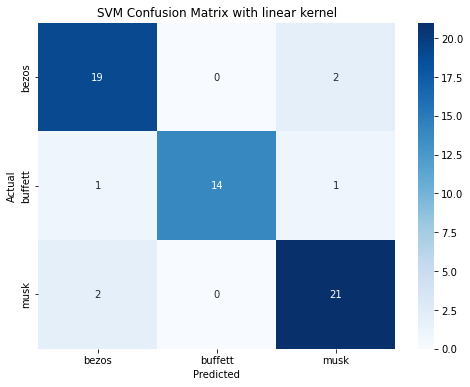

Kernel: linear
Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

       bezos       0.86      0.90      0.88        21
     buffett       1.00      0.88      0.93        16
        musk       0.88      0.91      0.89        23

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



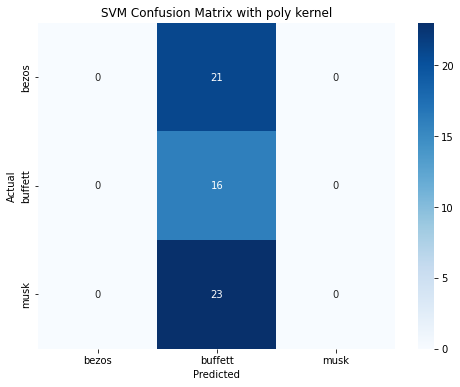

Kernel: poly
Accuracy: 0.26666666666666666
Classification Report:
              precision    recall  f1-score   support

       bezos       0.00      0.00      0.00        21
     buffett       0.27      1.00      0.42        16
        musk       0.00      0.00      0.00        23

    accuracy                           0.27        60
   macro avg       0.09      0.33      0.14        60
weighted avg       0.07      0.27      0.11        60



C:\Users\jeetp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeetp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeetp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


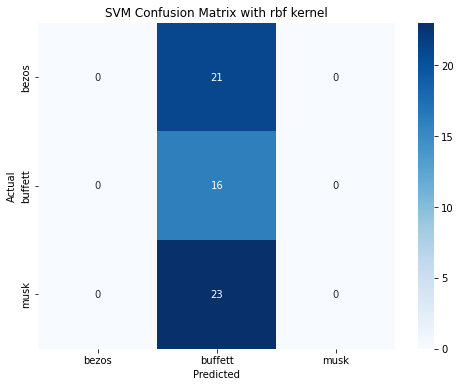

Kernel: rbf
Accuracy: 0.26666666666666666
Classification Report:
              precision    recall  f1-score   support

       bezos       0.00      0.00      0.00        21
     buffett       0.27      1.00      0.42        16
        musk       0.00      0.00      0.00        23

    accuracy                           0.27        60
   macro avg       0.09      0.33      0.14        60
weighted avg       0.07      0.27      0.11        60

The best performing kernel is 'linear' with an accuracy of 0.9


C:\Users\jeetp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeetp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeetp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-z]+', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Load the data
data = pd.read_csv("Comment_Data.csv")

# Drop missing values
data = data.dropna(subset=['comment'])

# Preprocess the data
data['comment'] = data['comment'].apply(preprocess_text)

# Split the data into Training and Testing sets
X = data['comment']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the textual data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train SVM classifiers with different kernels
kernels = ['linear', 'poly', 'rbf']
accuracies = []

for kernel in kernels:
    svm_classifier = SVC(kernel=kernel, C=1, gamma='auto')
    svm_classifier.fit(X_train_vectorized, y_train)

    # Make predictions
    y_pred = svm_classifier.predict(X_test_vectorized)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Visualize Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'SVM Confusion Matrix with {kernel} kernel')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print(f'Kernel: {kernel}\nAccuracy: {accuracy}\nClassification Report:\n{classification_report(y_test, y_pred)}')

# Compare kernel performance
best_kernel = kernels[np.argmax(accuracies)]
print(f"The best performing kernel is '{best_kernel}' with an accuracy of {max(accuracies)}")
